# Assignement9_FRossetti

### In this Assignment I'll explain step by step what we've done during the lesson.

First of all I import phyton standard functions and create the path for every document I need

In [1]:
ExternalFilesFolder = "/Users/federicarossetti/Desktop/github/python4ScientificComputing_Numpy_Pandas_MATPLotLIB/ExternalFiles"
ConsumptionFileName = "consumption_5545.csv"
TemperatureFileName = "Austin_weather_2014.csv"
IrradianceFileName = "irradiance_2014_gen.csv"

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path_consumptionFile = os.path.join(ExternalFilesFolder, ConsumptionFileName)
path_Temperaturefile = os.path.join(ExternalFilesFolder, TemperatureFileName)
path_Irradiance = os.path.join(ExternalFilesFolder, IrradianceFileName)

We have three excel file with : CONSUMPTION, WEATHER, IRRADIANCE.
From each file we exctract a range of data plotting togheter in the same graph

/Users/federicarossetti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/federicarossetti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/pandas/core/frame.py:2346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer(indexer, value)
/Users/federicarossetti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/pandas/core/frame.py:2326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in th

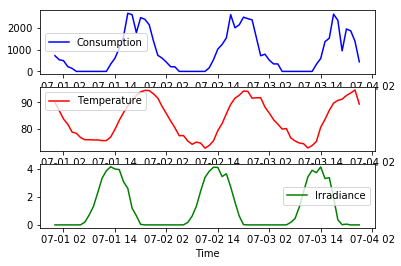

In [2]:
# CONSUMPTION
DF_consumption=pd.read_csv(path_consumptionFile,sep=",",index_col=0)
PreviousIndex=DF_consumption.index
NewParsedIndex=pd.to_datetime(PreviousIndex)
DF_consumption.index=NewParsedIndex
DF_consumption_someDaysInJuly=DF_consumption["2014-07-01 00:00:00":"2014-07-03 23:00:00"]

# TEMPERATURE
DF_weather=pd.read_csv(path_Temperaturefile, sep=";", index_col=0) 
PreviousIndex_weather=DF_weather.index
newIndex_weather=pd.to_datetime(PreviousIndex_weather)
DF_weather.index=newIndex_weather
DF_weather.columns
DF_Temperature=DF_weather[["temperature"]]
DF_Temperature_someDaysInJuly=DF_Temperature["2014-07-01 00:00:00":"2014-07-03 23:00:00"]


#IRRADIANCE
DF_irradianceSource=pd.read_csv(path_Irradiance, sep=";", index_col=1)
DF_irradiance=DF_irradianceSource[["gen"]]
DF_irradiance[DF_irradiance["gen"]<0]=0
PreviousIndex_irradiance=DF_irradiance.index
newIndex_irradiance=pd.to_datetime(PreviousIndex_irradiance)
DF_irradiance.index=newIndex_irradiance
DF_irradiance_someDaysInJuly=DF_irradiance["2014-07-01 00:00:00":"2014-07-03 23:00:00"]


fig,ax=plt.subplots(3) 
ax[0].plot(DF_consumption_someDaysInJuly, color="blue",label="Consumption")
ax[0].legend()
ax[1].plot(DF_Temperature_someDaysInJuly, color="r",label="Temperature")
ax[1].legend()
ax[2].plot(DF_irradiance_someDaysInJuly, color="g",label="Irradiance")
ax[2].legend()
plt.xlabel("Time")
plt.show()

Now we come back to the initial datframe joing consumption, temperature and irradiance and creating a copy of this datframe.
The code .copy() creates a copy of the initial dataframe and every change in the copied dataframe will not condition the initial dataframe

In [3]:
DF_joined = DF_consumption.join([DF_Temperature,DF_irradiance])
DF_joined_cleaned = DF_joined.dropna()
DF_joined_cleaned_copy = DF_joined.dropna().copy()

We take a close range of the dataframe

In [4]:
DF_joined_cleaned_chosenDates = DF_joined_cleaned_copy["2014-08-01":"2014-08-04"]

We replace the Not a number with zero and obtain a statistic description of the dataframe with the line code: .describe().
(for convenience we'll show only the head lines of the dataframe)

In [5]:
DF_joined_cleaned_chosenDates.dropna()
DF_joined_cleaned_chosenDates.describe()
DF_joined_cleaned_chosenDates.head()

,air conditioner_5545,temperature,gen
2014-08-01 00:00:00,825.183333,90.71,0.0
2014-08-01 01:00:00,677.516667,88.08,0.0
2014-08-01 02:00:00,535.883333,85.73,0.0
2014-08-01 03:00:00,474.450000,83.20,0.0
2014-08-01 04:00:00,228.800000,80.37,0.0


To correctly plot the graph it's better to normalize the dataframe defining the maximum and minimum value of every column.

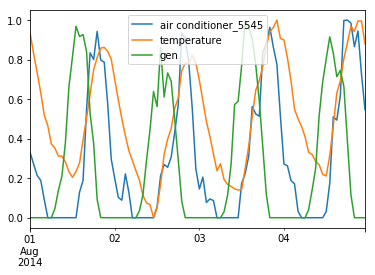

In [6]:
DF_joined_cleaned_chosenDates_min=DF_joined_cleaned_chosenDates.min()
DF_joined_cleaned_chosenDates_max=DF_joined_cleaned_chosenDates.max()
DF_joined_cleaned_chosenDates_normalized= (DF_joined_cleaned_chosenDates-DF_joined_cleaned_chosenDates_min)/(DF_joined_cleaned_chosenDates_max-DF_joined_cleaned_chosenDates_min)
plt.figure()
DF_joined_cleaned_chosenDates_normalized.plot()
plt.show()

In [7]:
DF_joined_cleaned_chosenDates_normalized.head()

,air conditioner_5545,temperature,gen
2014-08-01 00:00:00,0.328053,0.930938,0.0
2014-08-01 01:00:00,0.269347,0.825948,0.0
2014-08-01 02:00:00,0.213041,0.732136,0.0
2014-08-01 03:00:00,0.188618,0.631138,0.0
2014-08-01 04:00:00,0.090960,0.518164,0.0


From the graph above we note that the summit of temperature doesn't coincide we the summit of irradiance and this is a strange fact.
This happens since world is ideally divided in different zones called  "Time zones". A time zone is a region of the globe that observes a uniform standard time for legal, commercial, and social purposes. Time zones tend to follow the boundaries of countries and their subdivisions because it is convenient for areas in close commercial or other communication to keep the same time. Since our temperature data were measure in Austin ,capital of the U.S. state of Texas, we have to know that Austin is six hours backwards compared to Greenwich hours. 

So, to solve this problem we can shift the temperature column of five step backwards (-5). We consider five steps and not six because we've to consider the delay of temperature compared to generation. 
Earth's surface temperature is a balance between incoming solar radiation and outgoing terrestrial radiation.
Peak temperature lags after peak incoming solar energy because earth continues to warm until infrared radiation exceeds incoming solar energy.

/Users/federicarossetti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


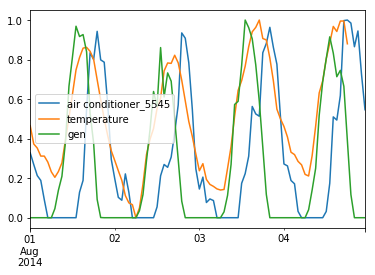

In [8]:
DF_joined_cleaned_chosenDates["temperature"]=DF_joined_cleaned_chosenDates["temperature"].shift(-5)
DF_joined_cleaned_chosenDates.dropna()

DF_joined_cleaned_chosenDates_min=DF_joined_cleaned_chosenDates.min()
DF_joined_cleaned_chosenDates_max=DF_joined_cleaned_chosenDates.max()
DF_joined_cleaned_chosenDates_normalized= (DF_joined_cleaned_chosenDates-DF_joined_cleaned_chosenDates_min)/(DF_joined_cleaned_chosenDates_max-DF_joined_cleaned_chosenDates_min)
plt.figure()
DF_joined_cleaned_chosenDates_normalized.plot()
plt.show()

As we can see from the graph the temperature graph is shifted as we desire.

In [9]:
DF_joined_cleaned_chosenDates_normalized.head()

,air conditioner_5545,temperature,gen
2014-08-01 00:00:00,0.328053,0.465469,0.0
2014-08-01 01:00:00,0.269347,0.373253,0.0
2014-08-01 02:00:00,0.213041,0.352495,0.0
2014-08-01 03:00:00,0.188618,0.311776,0.0
2014-08-01 04:00:00,0.090960,0.311776,0.0


Now I reconstruct the initial dataframe by applying time-zone

In [10]:
DF_joined = DF_consumption.join([DF_Temperature,DF_irradiance])
DF_mod = DF_joined.copy()
DF_mod["temperature"]=DF_mod["temperature"].shift(-5)
DF_mod.dropna(inplace=True)

To obtain a correct prediction of the load we need to consider the previous hours temperature values

In [11]:
DF_mod["Temperature -1h"]= DF_mod["temperature"].shift(1)
DF_mod["Temperature -2h"]= DF_mod["temperature"].shift(2)
DF_mod["Temperature -3h"]= DF_mod["temperature"].shift(3)
DF_mod["Temperature -4h"]= DF_mod["temperature"].shift(4)
DF_mod["Temperature -5h"]= DF_mod["temperature"].shift(5)
DF_mod["Temperature -6h"]= DF_mod["temperature"].shift(6)

Instead of doing this we can use a better way consisting in creating a function.

In [12]:
column_name="temperature"
df=DF_mod

def lag_feature(df,column_name,lag_start,lag_end,lag_interval):
    for i in range(lag_start,lag_end+1,lag_interval):
        new_column_name = column_name+" -"+str(i)+"hr"
        print new_column_name
        df[new_column_name]=df[column_name].shift(i)   
        df.dropna(inplace=True) #this removes all the row with a Nan
    return df

The function "lag_feature" takes the dataframe, the column which I'm interest in, the hour which I want to start and that i want to start with a specific lag interval.

So, to recall the function I write:

In [13]:
DF_mod=lag_feature(DF_mod,"temperature",1,6,1)

temperature -1hr
temperature -2hr
temperature -3hr
temperature -4hr
temperature -5hr
temperature -6hr


I can do the same with irradiance and consumption but now I want to rename the column with a simpler name and to do this I can write:

In [14]:
DF_mod=DF_mod.rename(columns={"air conditioner_5545":"AC_consumption","gen":"irradiance"})
DF_mod.head()

,AC_consumption,temperature,irradiance,Temperature -1h,Temperature -2h,Temperature -3h,Temperature -4h,Temperature -5h,Temperature -6h,temperature -1hr,temperature -2hr,temperature -3hr,temperature -4hr,temperature -5hr,temperature -6hr
2014-01-02 08:00:00,0.0,34.71,0.601517,36.82,38.09,40.63,45.27,48.82,51.75,36.82,38.09,40.63,45.27,48.82,51.75
2014-01-02 09:00:00,0.0,33.90,2.112517,34.71,36.82,38.09,40.63,45.27,48.82,34.71,36.82,38.09,40.63,45.27,48.82
2014-01-02 10:00:00,0.0,35.78,3.271167,33.90,34.71,36.82,38.09,40.63,45.27,33.90,34.71,36.82,38.09,40.63,45.27
2014-01-02 11:00:00,0.0,38.29,3.978083,35.78,33.90,34.71,36.82,38.09,40.63,35.78,33.90,34.71,36.82,38.09,40.63
2014-01-02 12:00:00,0.0,41.20,4.347650,38.29,35.78,33.90,34.71,36.82,38.09,38.29,35.78,33.90,34.71,36.82,38.09


In the line 21 I replace the label "air conditioner_5545" with "AC_consumption" and the label "gen" with "irradiance"!

So, let's lag irradiance from 3 to 6 hours and consumption in the last 24 hours.

In [15]:
DF_mod=  lag_feature(DF_mod,"irradiance",3,6,1)
DF_mod=  lag_feature(DF_mod,"AC_consumption",1,24,1)
DF_mod.head()

irradiance -3hr
irradiance -4hr
irradiance -5hr
irradiance -6hr
AC_consumption -1hr
AC_consumption -2hr
AC_consumption -3hr
AC_consumption -4hr
AC_consumption -5hr
AC_consumption -6hr
AC_consumption -7hr
AC_consumption -8hr
AC_consumption -9hr
AC_consumption -10hr
AC_consumption -11hr
AC_consumption -12hr
AC_consumption -13hr
AC_consumption -14hr
AC_consumption -15hr
AC_consumption -16hr
AC_consumption -17hr
AC_consumption -18hr
AC_consumption -19hr
AC_consumption -20hr
AC_consumption -21hr
AC_consumption -22hr
AC_consumption -23hr
AC_consumption -24hr


,AC_consumption,temperature,irradiance,Temperature -1h,Temperature -2h,Temperature -3h,Temperature -4h,Temperature -5h,Temperature -6h,temperature -1hr,...,AC_consumption -15hr,AC_consumption -16hr,AC_consumption -17hr,AC_consumption -18hr,AC_consumption -19hr,AC_consumption -20hr,AC_consumption -21hr,AC_consumption -22hr,AC_consumption -23hr,AC_consumption -24hr
2014-01-15 14:00:00,0.0,58.34,3.985133,57.37,53.34,49.51,43.73,39.31,39.24,57.37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-15 15:00:00,0.0,60.00,3.329083,58.34,57.37,53.34,49.51,43.73,39.31,58.34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-15 16:00:00,0.0,62.22,2.062200,60.00,58.34,57.37,53.34,49.51,43.73,60.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-15 17:00:00,0.0,62.35,0.457383,62.22,60.00,58.34,57.37,53.34,49.51,62.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-15 18:00:00,0.0,61.17,0.000000,62.35,62.22,60.00,58.34,57.37,53.34,62.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now I add the seasonality parameters adding a column called "hour" and one with the day of the week and I use sinusoidal functions to e a continuos data. To do this I use sine and cosine.

In [16]:
DF_mod["sin_hour"]=np.sin(DF_mod.index.hour*2*np.pi/24)
DF_mod["cos_hour"]=np.cos(DF_mod.index.hour*2*np.pi/24)

In [17]:
DF_mod["hour"]=DF_mod.index.hour
DF_mod["day_of_week"]=DF_mod.index.dayofweek
DF_mod["month"]=DF_mod.index.month
DF_mod["week_of_year"]=DF_mod.index.week
DF_mod.head(3)

,AC_consumption,temperature,irradiance,Temperature -1h,Temperature -2h,Temperature -3h,Temperature -4h,Temperature -5h,Temperature -6h,temperature -1hr,...,AC_consumption -21hr,AC_consumption -22hr,AC_consumption -23hr,AC_consumption -24hr,sin_hour,cos_hour,hour,day_of_week,month,week_of_year
2014-01-15 14:00:00,0.0,58.34,3.985133,57.37,53.34,49.51,43.73,39.31,39.24,57.37,...,0.0,0.0,0.0,0.0,-0.500000,-0.866025,14,2,1,3
2014-01-15 15:00:00,0.0,60.00,3.329083,58.34,57.37,53.34,49.51,43.73,39.31,58.34,...,0.0,0.0,0.0,0.0,-0.707107,-0.707107,15,2,1,3
2014-01-15 16:00:00,0.0,62.22,2.062200,60.00,58.34,57.37,53.34,49.51,43.73,60.00,...,0.0,0.0,0.0,0.0,-0.866025,-0.500000,16,2,1,3


Another thing is to create a function which recognize if the day belongs to the weekend or not and one to know which hours are for working and which aren't.

In [18]:
def WeekendDetector(day):
    if (day==5 or day == 6):
        weekendLabel=1
    else:
        weekendLabel=0
    return weekendLabel
    
def DayDetector(hour):
    if (hour< 19 and hour>=9):
        DayLabel=1
    else:
        DayLabel=0
    return DayLabel

To call function I write

In [19]:
DF_mod["weekend"]= DF_mod["day_of_week"].apply(WeekendDetector)
DF_mod["workingTime"] = DF_mod["hour"].apply(DayDetector)

Finally I want to correlate every data found with the corresponding one.

In [20]:
DF_mod.head()
DF_mod.columns
DF_mod.corr()

,AC_consumption,temperature,irradiance,Temperature -1h,Temperature -2h,Temperature -3h,Temperature -4h,Temperature -5h,Temperature -6h,temperature -1hr,...,AC_consumption -23hr,AC_consumption -24hr,sin_hour,cos_hour,hour,day_of_week,month,week_of_year,weekend,workingTime
AC_consumption,1.000000,0.568906,-0.012123,0.608764,0.637073,0.650370,0.648082,0.630557,0.598958,0.608764,...,0.849278,0.899832,-0.438616,0.212289,0.361084,-0.014680,0.128193,0.139342,-0.006139,-0.052868
temperature,0.568906,1.000000,0.329471,0.990933,0.968239,0.935078,0.894851,0.850786,0.805786,0.990933,...,0.578090,0.538805,-0.332356,-0.147348,0.243149,0.038316,0.161745,0.192112,0.037508,0.248255
irradiance,-0.012123,0.329471,1.000000,0.240539,0.143050,0.045884,-0.042859,-0.116530,-0.170926,0.240539,...,0.092638,-0.024705,-0.237615,-0.740567,0.167326,-0.028676,-0.032657,-0.024927,-0.030606,0.766236
Temperature -1h,0.608764,0.990933,0.240539,1.000000,0.990927,0.968216,0.935022,0.894761,0.850694,1.000000,...,0.606567,0.578113,-0.359214,-0.055928,0.262771,0.037167,0.162307,0.192759,0.037410,0.168644
Temperature -2h,0.637073,0.968239,0.143050,0.990927,1.000000,0.990921,0.968190,0.934970,0.894707,0.990927,...,0.620578,0.606595,-0.361440,0.039403,0.269941,0.036156,0.162955,0.193457,0.037244,0.080351
Temperature -3h,0.650370,0.935078,0.045884,0.968216,0.990921,1.000000,0.990912,0.968164,0.934943,0.968216,...,0.619536,0.620603,-0.338895,0.132105,0.261257,0.035496,0.163699,0.194208,0.037388,-0.009150
Temperature -4h,0.648082,0.894851,-0.042859,0.935022,0.968190,0.990912,1.000000,0.990908,0.968160,0.935022,...,0.604142,0.619544,-0.293096,0.215831,0.231935,0.035051,0.164558,0.195041,0.037833,-0.093557
Temperature -5h,0.630557,0.850786,-0.116530,0.894761,0.934970,0.968164,0.990908,1.000000,0.990909,0.894761,...,0.575194,0.604132,-0.227190,0.284843,0.176945,0.034757,0.165541,0.195898,0.038289,-0.168826
Temperature -6h,0.598958,0.805786,-0.170926,0.850694,0.894707,0.934943,0.968160,0.990909,1.000000,0.850694,...,0.535633,0.575181,-0.145707,0.334391,0.102534,0.034509,0.166569,0.196740,0.038638,-0.231724
temperature -1hr,0.608764,0.990933,0.240539,1.000000,0.990927,0.968216,0.935022,0.894761,0.850694,1.000000,...,0.606567,0.578113,-0.359214,-0.055928,0.262771,0.037167,0.162307,0.192759,0.037410,0.168644
